features shape: (569, 30)
target distribution (counts): [212 357]
target names: ['malignant' 'benign']

train shape: (455, 30) test shape: (114, 30)
train class distribution: [170 285]

SVM kernel results:
             accuracy  precision    recall
model                                     
SVM-linear   0.973684   0.985915  0.972222
SVM-poly     0.912281   0.878049  1.000000
SVM-rbf      0.982456   0.986111  0.986111
SVM-sigmoid  0.929825   0.957143  0.930556

Logistic Regression result:
                    accuracy  precision    recall
model                                            
LogisticRegression  0.982456   0.986111  0.986111


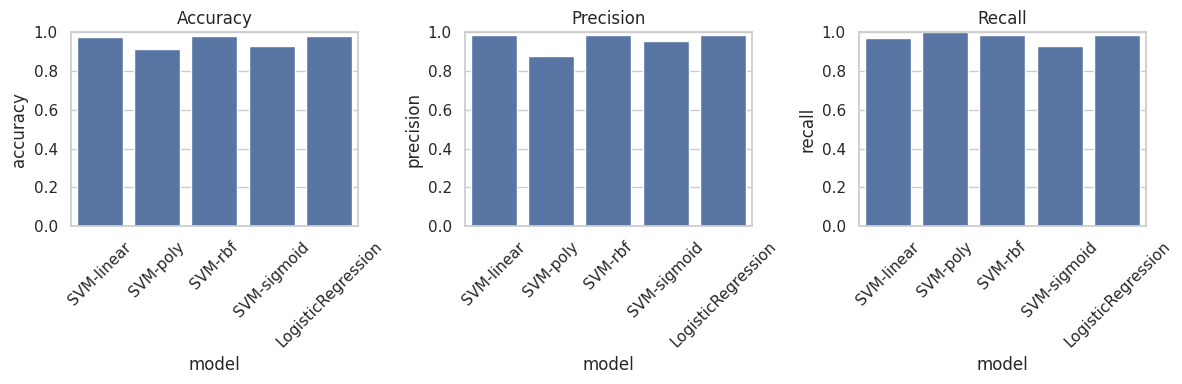

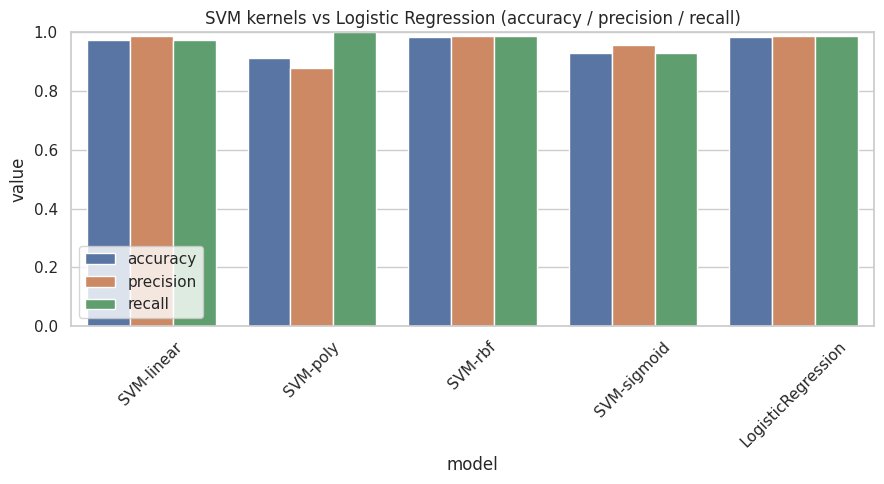


Best model by accuracy: SVM-rbf

 report for best model:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

confusion matrix (rows: true, columns: pred):
[[41  1]
 [ 1 71]]

 report for Logistic Regression (baseline):
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

confusion matrix (rows: true, columns: pred):
[[41  1]
 [ 1 71]]


In [12]:
# svm vs logistic regression on breast cancer dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

sns.set(style="whitegrid")
%matplotlib inline

# load data
data = datasets.load_breast_cancer()
X = data.data
y = data.target
target_names = data.target_names
print("features shape:", X.shape)
print("target distribution (counts):", np.bincount(y))
print("target names:", target_names)

#  split and scaling (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

print("\ntrain shape:", X_train_s.shape, "test shape:", X_test_s.shape)
print("train class distribution:", np.bincount(y_train))

# train svms to compare against eachother
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = []

for k in kernels:
    clf = SVC(kernel=k, random_state=42)
    clf.fit(X_train_s, y_train)
    y_pred = clf.predict(X_test_s)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    results.append({'model': f'SVM-{k}', 'accuracy': acc, 'precision': prec, 'recall': rec})

results_df = pd.DataFrame(results).set_index('model')
print("\nSVM kernel results:")
print(results_df)

# lolgistic regression bl
logreg = LogisticRegression(max_iter=2000, random_state=42)
logreg.fit(X_train_s, y_train)
y_pred_lr = logreg.predict(X_test_s)
acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr, zero_division=0)
rec_lr = recall_score(y_test, y_pred_lr, zero_division=0)
baseline = pd.DataFrame([{'model': 'LogisticRegression', 'accuracy': acc_lr, 'precision': prec_lr, 'recall': rec_lr}]).set_index('model')
print("\nLogistic Regression result:")
print(baseline)

# plot comparison
compare = pd.concat([results_df, baseline])
compare = compare[['accuracy', 'precision', 'recall']]

# bar plot for each metridc
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.barplot(x=compare.index, y=compare['accuracy'])
plt.ylim(0, 1)
plt.title('Accuracy')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.barplot(x=compare.index, y=compare['precision'])
plt.ylim(0, 1)
plt.title('Precision')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.barplot(x=compare.index, y=compare['recall'])
plt.ylim(0, 1)
plt.title('Recall')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# combined barplot
compare_long = compare.reset_index().melt(id_vars='model', var_name='metric', value_name='value')
plt.figure(figsize=(9,5))
sns.barplot(data=compare_long, x='model', y='value', hue='metric')
plt.ylim(0,1)
plt.xticks(rotation=45)
plt.title('SVM kernels vs Logistic Regression (accuracy / precision / recall)')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

# choose highest accuracy model
best_model_name = compare['accuracy'].idxmax()
print(f"\nBest model by accuracy: {best_model_name}")
if best_model_name.startswith('SVM'):
    kernel = best_model_name.split('-', 1)[1]
    best_clf = SVC(kernel=kernel, random_state=42).fit(X_train_s, y_train)
    y_pred_best = best_clf.predict(X_test_s)
else:
    best_clf = logreg
    y_pred_best = y_pred_lr

print("\n report for best model:")
print(classification_report(y_test, y_pred_best, target_names=target_names, zero_division=0))
print("confusion matrix (rows: true, columns: pred):")
print(confusion_matrix(y_test, y_pred_best))

print("\n report for Logistic Regression (baseline):")
print(classification_report(y_test, y_pred_lr, target_names=target_names, zero_division=0))
print("confusion matrix (rows: true, columns: pred):")
print(confusion_matrix(y_test, y_pred_lr))

# **Problem 2**

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


linear regression (Ridge) Results:
MSE: 0.5748, R²: 0.6494


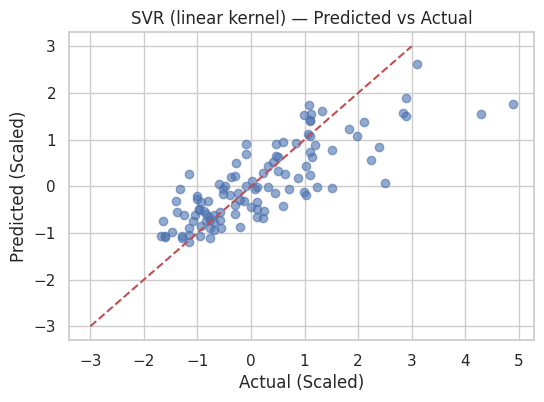

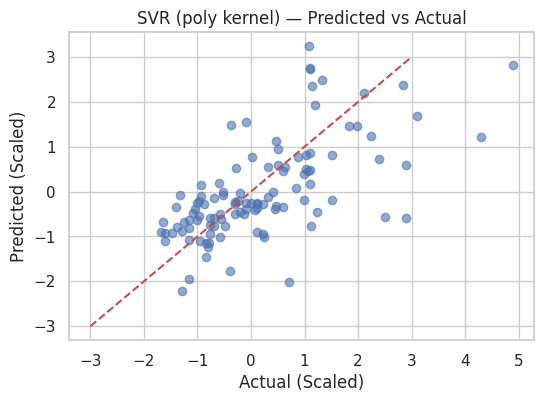

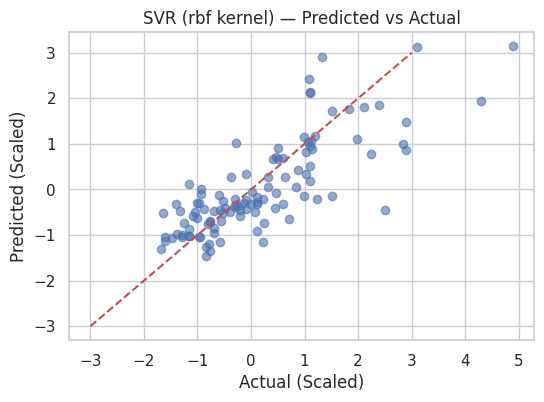

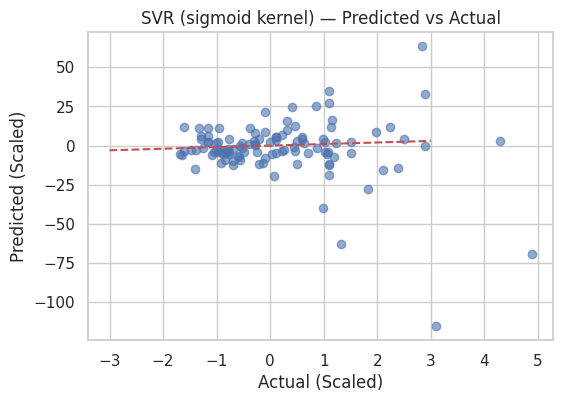


=== model comparison ===
Model           MSE             R²             
Ridge (Linear)  0.5748          0.6494         
SVR-linear     0.6099          0.6279         
SVR-poly       1.0541          0.3570         
SVR-rbf        0.6319          0.6145         
SVR-sigmoid    366.3037        -222.4528      


In [13]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# load data
url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv"
df = pd.read_csv(url)
display(df.head())



label_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col])


X = df.drop('price', axis=1)
y = df['price']

# split train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1,1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1,1)).ravel()


# linear regression from hw 1
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train_scaled)
y_pred_ridge = ridge.predict(X_test_scaled)

mse_ridge = mean_squared_error(y_test_scaled, y_pred_ridge)
r2_ridge = r2_score(y_test_scaled, y_pred_ridge)

print("linear regression (Ridge) Results:")
print(f"MSE: {mse_ridge:.4f}, R²: {r2_ridge:.4f}")

# same as part 1
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

for kernel in kernels:
    svr = SVR(kernel=kernel, C=10, gamma='scale')
    svr.fit(X_train_scaled, y_train_scaled)
    y_pred = svr.predict(X_test_scaled)

    mse = mean_squared_error(y_test_scaled, y_pred)
    r2 = r2_score(y_test_scaled, y_pred)
    results[kernel] = (mse, r2)

    # predict vs actual
    plt.figure(figsize=(6,4))
    plt.scatter(y_test_scaled, y_pred, alpha=0.6)
    plt.xlabel("Actual (Scaled)")
    plt.ylabel("Predicted (Scaled)")
    plt.title(f"SVR ({kernel} kernel) — Predicted vs Actual")
    plt.plot([-3, 3], [-3, 3], 'r--')
    plt.show()

# compare accuracy
print("\n=== model comparison ===")
print(f"{'Model':<15} {'MSE':<15} {'R²':<15}")
print(f"{'Ridge (Linear)':<15} {mse_ridge:<15.4f} {r2_ridge:<15.4f}")
for k, (mse, r2) in results.items():
    print(f"SVR-{k:<10} {mse:<15.4f} {r2:<15.4f}")
